In [1]:
import sys
sys.path.append('../../code/')

In [2]:
%load_ext autoreload
%autoreload 2

from libs import io
from libs import constants
from libs import vis
from libs import helpers
from libs.metrics import aggregators
from libs.metrics import helpers as helpers_metrics
from libs.visuals import polar_infra
from libs import latex

Available LLMs: (24): llama-3.3-8b llama-4-scout llama-4-mav gpt-oss-20b gpt-oss-120b qwen3-8b qwen3-14b qwen3-32b qwen3-30b-a3b-2507 qwen3-235b-a22b-2507 gemma-3-12b gemma-3-27b mistral-small-3.2-24b mistral-medium-3 llama-3.1-70b llama-3.3-70b llama-3.1-405b grok-4-fast deepseek-chat-v3.1 deepseek-r1-0528 gemini-2.5-flash gemini-2.5-flash-grounded gemini-2.5-pro gemini-2.5-pro-grounded


# Setup

In [3]:
APS_OA_DATA_TAR_GZ = '../../../APS/data/final_dataset.tar.gz'
APS_OS_DISCIPLINE_DEMOGRAPHICS = '../../results/interventions/metadata/disciplines_author_demographics.csv'


In [30]:

RESULTS_PATH = '../../results/ground_truth'
PLOTS_PATH = io.path_join(RESULTS_PATH, 'plots')    

io.validate_path(PLOTS_PATH)

In [4]:
vis.sns_reset()
vis.sns_paper_style(font_scale=1.55)

## Data

In [5]:
# demographics
df_all_authors_demographics = io.read_file_from_tar_gz_as_dataframe(APS_OA_DATA_TAR_GZ, constants.APS_OA_AUTHORS_DEMOGRAPHICS_FN)
df_all_authors_demographics.rename(columns={'id_author':'id_author_oa'}, inplace=True)

# scholarly stats
df_all_authors_stats = io.read_file_from_tar_gz_as_dataframe(APS_OA_DATA_TAR_GZ, constants.APS_OA_AUTHORS_STATS_FN)
df_all_authors_stats.rename(columns={'id_author':'id_author_oa'}, inplace=True)

# per discipline
df_gt_stats = io.read_csv(APS_OS_DISCIPLINE_DEMOGRAPHICS, index_col=0, header=[0, 1])

# gt (from APS)
df_gt = df_all_authors_demographics[['id_author_oa','first_name','last_name','ethnicity','gender']].copy()
df_gt = df_gt.merge(df_all_authors_stats[['id_author_oa','works_count','cited_by_count', 'rr1_rank_publications','rr1_rank_publications_percentile', 'rr2_rank_citations','rr2_rank_citations_percentile']], on='id_author_oa', how='left')
df_gt = helpers.add_quantiles(df_gt)

# shapes
df_all_authors_demographics.shape, df_gt_stats.shape, df_gt_stats.shape, df_gt.shape

((481012, 14), (17, 19), (17, 19), (481012, 13))

## Stats

In [6]:
df_gt.gender.value_counts(normalize=True) * 100

gender
Male       44.432779
Unknown    42.221192
Female      8.772130
Unisex      4.573898
Name: proportion, dtype: float64

In [7]:
df_gt.ethnicity.value_counts(normalize=True) * 100

ethnicity
Asian                        44.591819
White                        38.731882
Hispanic or Latino            8.247195
Black or African American     6.055982
Unknown                       2.373122
Name: proportion, dtype: float64

# Plots

/tmp/ipykernel_290092/3899807738.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{s:.0f}%" for s in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_290092/3899807738.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{s:.0f}%" for s in ax.get_xticks()], fontsize=12)


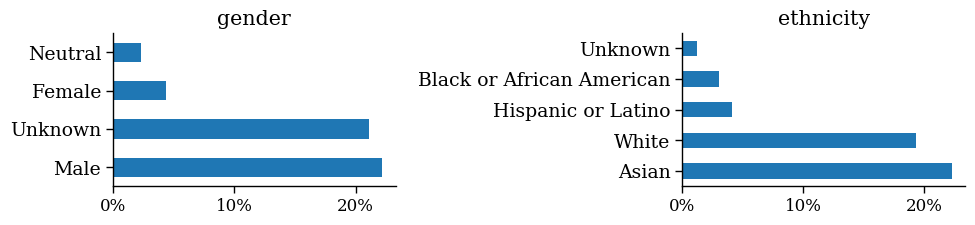

In [32]:
df_gender = df_gt.copy()
df_gender.gender = df_gender.gender.replace({'Unisex': 'Neutral'})
df_gender = df_gender.gender.value_counts(normalize=True) * 100
df_ethnicity = df_gt.ethnicity.value_counts(normalize=True) * 100

fig, (ax1, ax2) = vis.plt.subplots(1, 2, figsize=(10, 2.5))
for attr, ax, df in zip(['gender', 'ethnicity'], [ax1, ax2], [df_gender, df_ethnicity]):
    ax = df.plot(kind='barh', ax=ax)
    ax.set_title(attr)
    ax.set_xticklabels([f"{s:.0f}%" for s in ax.get_xticks()], fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')


fn = io.path_join(PLOTS_PATH, 'gender_ethnicity.pdf')
fig.savefig(fn, bbox_inches='tight', dpi=constants.FIG_DPI)

vis.plt.tight_layout()
vis.plt.show()
vis.plt.close()


In [23]:
df_gender

gender
Male       44.432779
Unknown    42.221192
Female      8.772130
Unisex      4.573898
Name: proportion, dtype: float64